# Setup

Import the packages we will be using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Load the .csv file into a numpy dataframe.

In [2]:
df = pd.read_csv(r"fifa21rawdata.csv");

C:\Users\besso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Get a grasp of what the dataset contains.

In [3]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

# Q1. Convert the height and weight columns to numerical forms.
First observe some of the values we have in each of these columns.

In [5]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [6]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

We have a mix of metric and imperial units in both. We write two functions which convert the imperial units into metric units.

In [7]:
def ft_to_cm(x):
    # identify entries in feet
    if "\'" in x:
        # format slightly
        x = x.replace('"','')
        # convert to a length 2 list, first entry feet, second entry inches
        y = x.split("\'")
        # conversion to cm
        cm = (int(y[0]) * 30.48) + (int(y[1]) * 2.54)
        # round to a whole number and convert to int data type
        return int(round(cm,0))
    # identify entries already in cm
    else:
        # remove the cm phrase
        x=x.replace("cm","")
        # convert to int data type
        return int(x)

def lb_to_kg(x):
    # identify entries in lbs
    if "lbs" in x:
        # remove the lbs phrase
        x = x.replace("lbs","")
        # conversion to kg
        kg = int(x) * 0.453592
        # round to a whole number and convert to int data type
        return int(round(kg,0))
    # identify entries already in kgs
    else:
        # remove kg phrase
        x = x.replace("kg","")
        # convert to int data type
        return(int(x))

Apply these new functions to our columns.

In [8]:
df['Height'] = df['Height'].apply(ft_to_cm)
df['Weight'] = df['Weight'].apply(lb_to_kg)

Double check that they have been applied correctly.

In [9]:
df['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [10]:
df['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

# Q2. Remove unnecessary newline characters.

On first sight, I can only see the 'clubs' column with any newline characters. But to be safe, we should remove any \n phrases within all the columns. We do not need to check those columns with int or float data types.

In [11]:
# iterate over every column with the object (i.e. string) data type
for column in df:
    # pick out the columns with the object data type, as the 'replace' function will not work on numerical data type columns
    column_type = df[column].dtype
    if column_type == 'object':
        # remove the \n phrases
        df[column] = df[column].str.replace("\n","")

# Q3. Based on the 'joined' column, check which players have been playing at a club for over 10 years.
NOTE: Since this dataset is not constantly being updated, if we were to use today's date to identify these players, there will be a day in the future where every player would be on this list! Thus, I will use the release date of FIFA21 in the UK as "today's date" when tackling this question.

The 'Joined' column shows the date that the player joined their club. It is currently an object (string) datatype.

In [12]:
df['Joined'] = pd.to_datetime(df['Joined'])
df['Joined'].head()

0   2004-07-01
1   2018-07-10
2   2014-07-16
3   2015-08-30
4   2017-08-03
Name: Joined, dtype: datetime64[ns]

Double-check that the latest date within this 'Joined' column is before the release date for FIFA21, or else we will run into errors when making calculations.

In [13]:
df['Joined'].max()

Timestamp('2020-10-08 00:00:00')

Create a column whose entries are all the date of release for FIFA21. We do it as a column to make the calculation easier. We will drop this column later on.

In [14]:
# FIFA21 was released on the 9th October 2020
df['todays_date'] = pd.to_datetime("2020-10-09")
df['todays_date'].head()

0   2020-10-09
1   2020-10-09
2   2020-10-09
3   2020-10-09
4   2020-10-09
Name: todays_date, dtype: datetime64[ns]

Create a column with the number of days the player has been at given club.

In [15]:
# calculate the difference in days
df['date_difference'] = df['todays_date'] - df['Joined'] 
# convert to an integer instead of timedelta64 data type
df['date_difference'] = df['date_difference'].dt.days
df['date_difference'].head()

0    5944
1     822
2    2277
3    1867
4    1163
Name: date_difference, dtype: int64

Create a column of boolean values, 'True' if the player has been at the club for 10 years, 'False' if not. Note that 10 years is 3652.5 days.

In [16]:
df['ten_years'] = np.where(df['date_difference'] > 3652.5, True, False)
df['ten_years'].head(20)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16     True
17    False
18    False
19    False
Name: ten_years, dtype: bool

Drop the temporary columns.

In [17]:
columns_to_drop = ['todays_date', 'date_difference']
df.drop(columns = columns_to_drop, axis = 1, inplace = True)

Depending on the context of the project, we can then use this new boolean column to retrieve the names of those such players!

In [18]:
# create a filtered version of the database with only the players who have played at the same club for 10 years
ten_years_players = df[df['ten_years']]
# return these players names
ten_years_players['Name']

0            L. Messi
15         K. Benzema
16       Sergio Ramos
23            H. Kane
39       G. Chiellini
             ...     
15904          Sun Bo
16109        K. Miura
16519     J. Popelard
16709     M. Al Wakid
17186      Yao Hanlin
Name: Name, Length: 203, dtype: object

# Q4. Convert the 'Value', 'Wage' and 'Release Clause' columns from strings to numbers.
Observe the values within each of these columns to get a feel.

In [19]:
df['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [20]:
df['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [21]:
df['Release Clause'].unique()

array(['€138.4M', '€75.9M', '€159.4M', ..., '€59K', '€35K', '€64K'],
      dtype=object)

In [22]:
# define a function for what we need to do
def K_M_convert(x):
    # ensure any entries are strings before manipulating
    x = str(x)
    
    # remove any leading euro signs
    x = x.replace("€","")
    
    # dealing with millions
    if "M" in x:
        x = x.replace("M","")
        x = float(x) * 1000000
    
    # dealing with thousands
    elif "K" in x:
        x = x.replace("K","")
        x = float(x) * 1000
       
    # return integer values, dealing with null values as well (used later on)
    if x != "nan":
        x = int(x)
        
    return x

# apply this function to each column
df['Value'] = df['Value'].apply(K_M_convert)
df['Wage'] = df['Wage'].apply(K_M_convert)
df['Release Clause'] = df['Release Clause'].apply(K_M_convert)

Double check that our function gives the correct output.

In [23]:
df['Release Clause'].unique()

array([138400000,  75900000, 159400000, ...,     59000,     35000,
           64000], dtype=int64)

# Q5. For columns with ★ signs in, remove them. Then convert their data type to numerical.
We loop over every column to identify which have ★ signs in. We strip any instances of the ★ sign, and save these columns within a list.

In [24]:
# used to identify which columns have ★ signs in
columns_to_convert = []
# go over every column and identify their type
for column in df:
    column_type = df[column].dtype
    # pick out the columns with the 'object' type, and also contain a ★ sign somewhere within the column
    if column_type == 'object' and df[column].str.contains("★").any():
        # add such columns to the columns_to_convert list
        columns_to_convert.append(column)
        # remove the ★ characters
        df[column] = df[column].str.replace("★","")

Double-check that we have the correct columns saved, and also check whether we should convert these columns to int or float.

In [25]:
df[['W/F','SM','IR']].head()

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


The correct choice is clearly int.

In [26]:
for column in columns_to_convert:
    df[column] = df[column].astype(np.int64)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18979 non-null  int64         
 1   Name              18979 non-null  object        
 2   LongName          18979 non-null  object        
 3   photoUrl          18979 non-null  object        
 4   playerUrl         18979 non-null  object        
 5   Nationality       18979 non-null  object        
 6   Age               18979 non-null  int64         
 7   ↓OVA              18979 non-null  int64         
 8   POT               18979 non-null  int64         
 9   Club              18979 non-null  object        
 10  Contract          18979 non-null  object        
 11  Positions         18979 non-null  object        
 12  Height            18979 non-null  int64         
 13  Weight            18979 non-null  int64         
 14  Preferred Foot    1897

The columns have been converted correctly!

In [27]:
print(max(df['Value']))

185500000


# Interlude: Further cleaning
Before tackling Q6 and conducting any further analyses of the data, there are some further cleaning tasks which should be done. I have been making note of these issues while I was working on questions 1 to 5.

In [28]:
columns_with_nulls = df.isna().any()
df.columns[columns_with_nulls].tolist()

['Loan Date End', 'Hits']

### Dropping columns
A few of the columns are not of any use to us. Namely, the 'LongName','photoUrl', 'playerUrl', 'Loan Date End' and 'Release Clause' columns.

In [29]:
columns_to_drop = ['LongName', 'photoUrl', 'playerUrl', 'Loan Date End']
df = df.drop(columns = columns_to_drop, axis = 1)

### Convert 'Hits' column

Observe the values we have within the 'Hits' column.

In [30]:
df['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [31]:
df.Hits.apply(type).value_counts()

<class 'str'>      16357
<class 'float'>     2622
Name: Hits, dtype: int64

In [32]:
df['Hits'].isna().sum()

2622

There are entries with 'K' in, so we will use the K_M_convert we defined in Q4 to convert these. There are some 'float' entries in the column, but we can see that these are actually 'nan' values. We cannot simply set these to 0. Since it is unclear how to deal with these, we have to make sure that they are kept as they are. The K_M_convert function has been defined such that this is the case.

In [33]:
df['Hits'] = df['Hits'].apply(K_M_convert)

In [34]:
df['Hits'].unique()

array([771, 562, 150, 207, 595, 248, 246, 120, 1600, 130, 321, 189, 175,
       96, 118, 216, 212, 154, 205, 202, 339, 408, 103, 332, 86, 173, 161,
       396, 1100, 433, 242, 206, 177, 1500, 198, 459, 117, 119, 209, 84,
       187, 165, 203, 65, 336, 126, 313, 124, 145, 538, 182, 101, 45, 377,
       99, 194, 403, 414, 593, 374, 245, 3200, 266, 299, 309, 215, 265,
       211, 112, 337, 70, 159, 688, 116, 63, 144, 123, 71, 224, 113, 168,
       61, 89, 137, 278, 75, 148, 176, 197, 264, 214, 247, 402, 440, 1700,
       2300, 171, 320, 657, 87, 259, 200, 255, 253, 196, 60, 97, 85, 169,
       256, 132, 239, 166, 121, 109, 32, 46, 122, 48, 527, 199, 282, 51,
       1900, 642, 155, 323, 288, 497, 509, 79, 49, 270, 511, 80, 128, 115,
       156, 204, 143, 140, 152, 220, 134, 225, 94, 74, 135, 142, 50, 77,
       40, 107, 193, 179, 34, 64, 453, 57, 81, 28, 78, 133, 43, 425, 88,
       42, 36, 233, 376, 210, 444, 100, 263, 98, 29, 160, 39, 257, 6, 310,
       138, 62, 293, 285, 362, 66, 69, 5

In [35]:
df.Hits.apply(type).value_counts()

<class 'int'>    16357
<class 'str'>     2622
Name: Hits, dtype: int64

We have successfully formatted this column, while keeping the nan values intact.

# Q6. Which players are valuable yet underpaid? 

<ipython-input-36-afa917379305>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xticklabels);
<ipython-input-36-afa917379305>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(yticklabels);


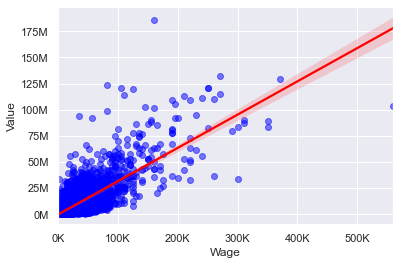

In [36]:
# set a background
sns.set(style = 'darkgrid')

# set a scatterplot with a regression line
g = sns.regplot(data = df, x = 'Wage', y = 'Value', 
                scatter_kws = {'color' : 'blue', 'alpha' : 0.5}, 
                line_kws = {'color' : 'red'})

# format the x ticks more clearly
xticklabels = ["{:.0f}".format(x) + "K" for x in g.get_xticks()/1000];
# set_xticklabels prints a list, so use a semicolon to mute the output
g.set_xticklabels(xticklabels);

# format the y ticks
yticklabels = ["{:.0f}".format(y) + "M" for y in g.get_yticks()/1000000];
# use a semicolon again
g.set_yticklabels(yticklabels);


There are many outliers here, but there are two clear anomalies which we will identify. Namely, those players with the highest value and the highest wage respectively.

In [37]:
max_value = max(df['Value'])
df[df['Value'] == max_value]['Name']

8    K. Mbappé
Name: Name, dtype: object

In [38]:
max_wage = max(df['Wage'])
df[df['Wage'] == max_wage]['Name']

0    L. Messi
Name: Name, dtype: object

We can see that at the time FIFA21 was made, Kilian Mbappé was the most underpriced player in the world, whereas Lionel Messi was the most overpriced!